## 调查数据集
将要分析的数据集为titanic_data

数据集包括泰坦尼克号上 2224 名乘客和船员中的 891 个乘客的基本信息。

数据集来自Kaggle

乘客生还率与哪些因素有关系？本次分析将在年龄、性别和舱位等级三个方面进行调查。 


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

 
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)
#full_data.describe()
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



Cabin有较大缺失，但是与我们的分析无关，所以可以删除该列


In [44]:
full_data = full_data.drop(['Cabin','Embarked'], axis=1)


Age缺失较少，可以简单将其舍弃


In [45]:
full_data=full_data.dropna()

In [46]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 61.4+ KB


## 年龄因素

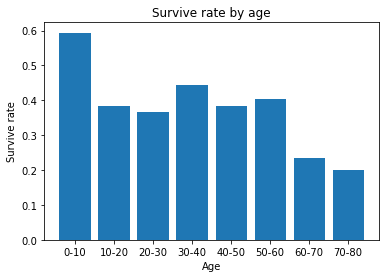

In [47]:
subsection = []
survivals = []

for i in range (0,8):
    subsection.append(full_data.loc[(full_data['Age'] <= (i + 1) * 10) & (full_data['Age'] > i * 10)])
for j in range (0,8):
    if len(subsection[j]) != 0:
        survivals.append(len(subsection[j].loc[full_data['Survived'] == 1])/len(subsection[j]))
    else: 
        survivals.append(0)

view = ['0-10', '10-20','20-30', '30-40','40-50','50-60','60-70', '70-80']
y_pos = np.arange(len(view))
plot.bar(y_pos, survivals)
plot.xticks(y_pos, view)
plot.xlabel('Age')
plot.ylabel('Survive rate')
plot.title('Survive rate by age')
plot.show()

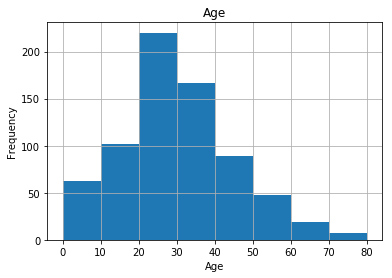

In [48]:
full_data.hist(column="Age", bins=range(0,90,10))
plot.xlabel("Age")
plot.ylabel("Frequency")
plot.show()

根据生还率与人数分析，0-10岁的生还率最高，60-80的生还率虽然最低，但人数太少，偶然因素更大。所以结论可以认为1-10岁生还率最高，其他年龄段生还率无明显差别

## 性别因素

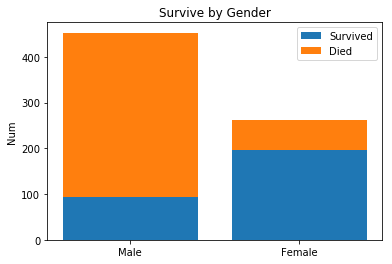

In [49]:
survived = full_data.loc[full_data['Survived'] == 1]
survived_count = len(survived['Name'])
died = full_data.loc[full_data['Survived'] == 0]
died_count = len(died['Name'])

survived_male = survived.loc[survived['Sex'] == 'male']
survived_male_count = len(survived_male['Name'])
died_male = died.loc[died['Sex'] == 'male']
died_male_count = len(died_male['Name'])

survived_female = survived.loc[survived['Sex'] == 'female']
survived_female_count = len(survived_female['Name'])
died_female = died.loc[died['Sex'] == 'female']
died_female_count = len(died_female['Name'])


index = np.arange(2)

p1 = plot.bar(index, (survived_male_count, survived_female_count))
p2 = plot.bar(index, (died_male_count, died_female_count),bottom=(survived_male_count, survived_female_count))
plot.title('Survive by Gender')
plot.ylabel('Num')
plot.xticks(index, ('Male', 'Female'))
plot.legend((p1[0], p2[0]), ('Survived', 'Died'))

plot.show()

显然女性的生还率更高

## 船舱等级因素

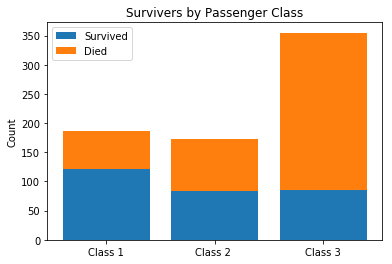

In [50]:
Pclass_1_survived = len(full_data[(full_data['Pclass'] == 1) & (full_data['Survived'] == 1)])
Pclass_1_died = len(full_data[(full_data['Pclass'] == 1) & (full_data['Survived'] == 0)])
Pclass_2_survived = len(full_data[(full_data['Pclass'] == 2) & (full_data['Survived'] == 1)])
Pclass_2_died = len(full_data[(full_data['Pclass'] == 2) & (full_data['Survived'] == 0)])
Pclass_3_survived = len(full_data[(full_data['Pclass'] == 3) & (full_data['Survived'] == 1)])
Pclass_3_died = len(full_data[(full_data['Pclass'] == 3) & (full_data['Survived'] == 0)])

index = np.arange(3)

p1 = plot.bar(index, (Pclass_1_survived, Pclass_2_survived, Pclass_3_survived) )
p2 = plot.bar(index, (Pclass_1_died    , Pclass_2_died    , Pclass_3_died    ), 
              bottom=(Pclass_1_survived, Pclass_2_survived, Pclass_3_survived) )

plot.ylabel('Count')
plot.title('Survivers by Passenger Class')
plot.xticks(index, ('Class 1', 'Class 2 ', 'Class 3'))
plot.legend((p1[0], p2[0]), ('Survived', 'Died'))

plot.show()

显然一等舱二等舱的旅客比三等舱的旅客拥有更高的生还率

## 结论

我假设了有三种因素对生还率有影响，年龄、性别、客舱等级。结论是年龄小于10岁的、女性、船舱等级高的人具有更高的生还率。

不足之处，比如891的样本是如何抽取的并不清楚。而且数据本身有缺失，舍弃掉相应数据后，使得数据样本数量也减少了。
 